### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil

# Local imports
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()



### 30 cm


In [2]:
# Define study
STUDY_NAME = "tune_scan_30cm_lower_emittance"
COLLIDER = "base_collider"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)


df

normalized amplitude in xy-plane  \
beam  name base collider qx     qy                                         
lhcb1 base_collider      62.305 60.309                             4.500   
                                60.310                             4.531   
                                60.311                             4.531   
                                60.312                             4.625   
                                60.313                             4.500   
...                                                                  ...   
                         62.323 60.328                             4.500   
                                60.329                             4.500   
                         62.324 60.328                             4.500   
                                60.329                             4.500   
                         62.325 60.329                             4.500   

                                            qx      qy   dqx   dqy  \
beam  name base collider qx     qy                                   
lhcb1 base_collider      62.305 60.309  62.305  60.309  15.0  15.0   
                                60.310  62.305  60.310  15.0  15.0   
                                60.311  62.305  60.311  15.0  15.0   
                                60.312  62.305  60.312  15.0  15.0   
                                60.313  62.305  60.313  15.0  15.0   
...                                        ...     ...   ...   ...   
                         62.323 60.328  62.323  60.328  15.0  15.0   
                                60.329  62.323  60.329  15.0  15.0   
                         62.324 60.328  62.324  60.328  15.0  15.0   
                                60.329  62.324  60.329  15.0  15.0   
                         62.325 60.329  62.325  60.329  15.0  15.0   

                                        i_bunch_b1  i_bunch_b2  \
beam  name base collider qx     qy                               
lhcb1 base_collider      62.305 60.309       978.0       975.0   
                                60.310       978.0       975.0   
                                60.311       978.0       975.0   
                                60.312       978.0       975.0   
                                60.313       978.0       975.0   
...                                            ...         ...   
                         62.323 60.328       978.0       975.0   
                                60.329       978.0       975.0   
                         62.324 60.328       978.0       975.0   
                                60.329       978.0       975.0   
                         62.325 60.329       978.0       975.0   

                                        num_particles_per_bunch  \
beam  name base collider qx     qy                                
lhcb1 base_collider      62.305 60.309             1.150000e+11   
                                60.310             1.150000e+11   
                                60.311             1.150000e+11   
                                60.312             1.150000e+11   
                                60.313             1.150000e+11   
...                                                         ...   
                         62.323 60.328             1.150000e+11   
                                60.329             1.150000e+11   
                         62.324 60.328             1.150000e+11   
                                60.329             1.150000e+11   
                         62.325 60.329             1.150000e+11   

                                        crossing_angle  
beam  name base collider qx     qy                      
lhcb1 base_collider      62.305 60.309           160.0  
                                60.310           160.0  
                                60.311           160.0  
                                60.312           160.0  
                                60.313           160.0  
...       

In [3]:
# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

# Reshape for plotting
df_to_plot = df.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")
df_to_plot

qx,62.305,62.306,62.307,62.308,62.309,62.310,62.311,62.312,62.313,62.314,...,62.316,62.317,62.318,62.319,62.320,62.321,62.322,62.323,62.324,62.325
qy,,,,,,,,,,,,,,,,,,,,,
60.309,4.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.310,4.531,4.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.311,4.531,4.750,4.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.312,4.625,4.844,4.875,5.062,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.313,4.500,5.062,5.062,5.281,5.156,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.314,4.656,4.906,4.938,5.000,4.906,4.969,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.315,4.656,5.188,5.031,5.062,5.156,4.656,5.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.316,4.500,5.156,5.031,5.156,4.781,4.875,4.969,4.875,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.317,4.562,4.906,5.062,5.000,4.750,4.844,4.812,5.094,5.438,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


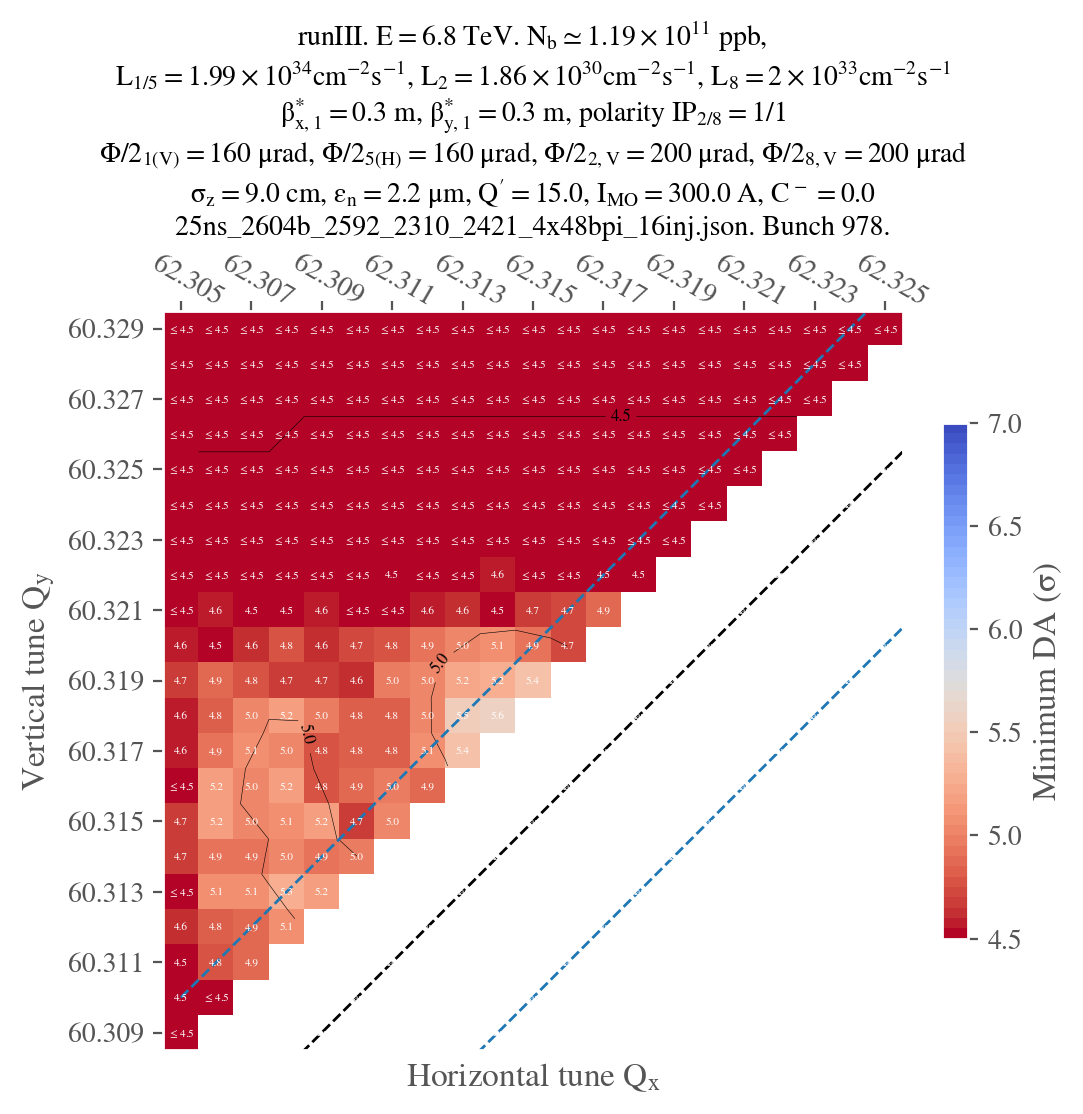

In [4]:

# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = True,
    green_contour = 5.5,
    extended_diagonal=False,
    vmin = 4.5,
    vmax = 7,
)
if SAVE_STUDY_EOS:
    path_archive, path_EOS = analysis_functions.copy_study_on_eos(STUDY_NAME)
    #analysis_functions.archive_and_clean(path_archive, path_EOS)